`tflearn` implementation of spiral classification problem from Stanford CS231n: http://cs231n.github.io/neural-networks-case-study/

In [3]:
# A bit of setup
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1, 1)

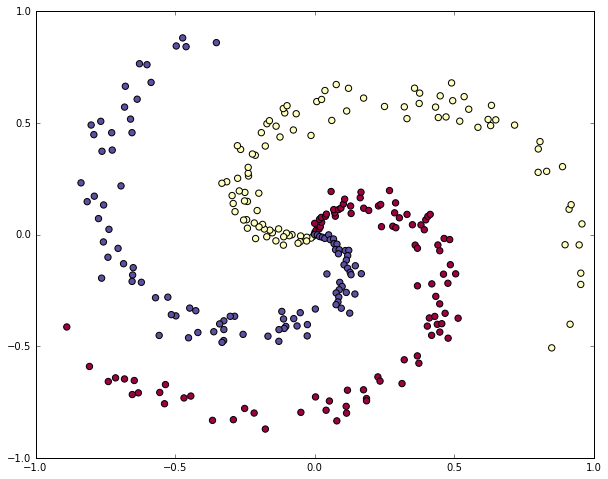

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [3]:
# train a linear classifier
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical

with tf.Graph().as_default():
    net = tflearn.input_data([None, 2])
    net = tflearn.fully_connected(net, 3, activation='softmax')
    gd = tf.train.GradientDescentOptimizer(learning_rate=1.0)
    net = tflearn.regression(net, optimizer=gd, loss='categorical_crossentropy')

    Y = to_categorical(y, 3)
    lm = tflearn.DNN(net)
    lm.fit(X, Y, show_metric=True, batch_size=len(X), n_epoch=1000, snapshot_epoch=False)

Training Step: 1000  | total loss: 0.77533
| Optimizer | epoch: 1000 | loss: 0.77533 - acc: 0.4933 -- iter: 000/300


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback, ProgbarLogger
from IPython.core.display import clear_output

class ClearOutput(Callback):
    def on_epoch_end(self, epoch, logs={}):
        clear_output(wait=True)
        

model = Sequential([
        Dense(100, input_dim=2),
        Activation('relu'),
        Dense(3),
        Activation('softmax'),
])
sgd = SGD(lr=1., decay=0.0)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, to_categorical(y, 3), nb_epoch=1000, batch_size=len(X),
          verbose=1, callbacks=[ProgbarLogger(), ClearOutput()])

300/300 [==============================] - 0s - loss: 0.0636 - acc: 0.9867


Accuracy: 98.66666666666667%


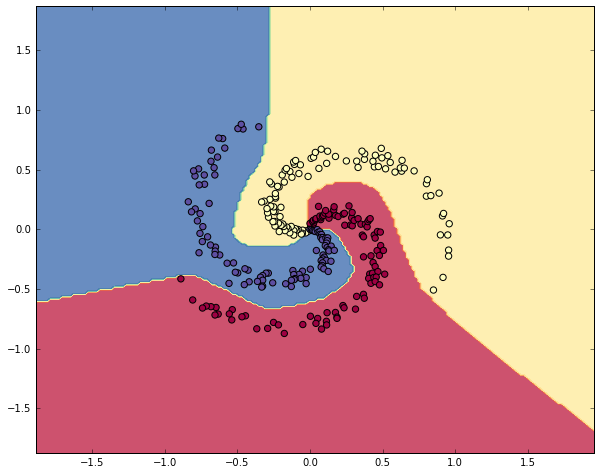

In [7]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')
print("Accuracy: {}%".format(100 * np.mean(y == np.argmax(model.predict(X), axis=1))))